<a href="https://colab.research.google.com/github/veenamekkatt/DSA_Assignments/blob/main/CaseStudy_Week10_DataPreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statistics as st

#1. Load the dataset into python environment

In [3]:
data = pd.read_csv("/content/titanic_dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Our data is list of passenders information in titanic ,it has 891 rows and 12 columns.

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#2. Make ‘PassengerId’ as the index column

In [5]:

data1 = data.set_index("PassengerId")
data1.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#3. Check the basic details of the dataset

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#4. Fill in all the missing values present in all the columns in the dataset

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data['Age'] = data['Age'].fillna( st.mode(data['Age'])) 
#filling the null values in age column using median

In [9]:
mode = st.mode(data['Embarked'])
mode
data['Embarked'] = data['Embarked'].fillna(mode) 
#fill the Embarked with mode dataset as only 2 missing data
#fill the Cabin with a new category as 77% of data is missing
data['Cabin']=data['Cabin'].fillna('Unknown')
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#5.Check and handle outliers in at least 3 columns in the dataset

{'boxes': [<matplotlib.lines.Line2D at 0x7f4d89910c90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4d89919d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4d89920d50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4d89920810>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4d89919290>,
  <matplotlib.lines.Line2D at 0x7f4d899197d0>]}

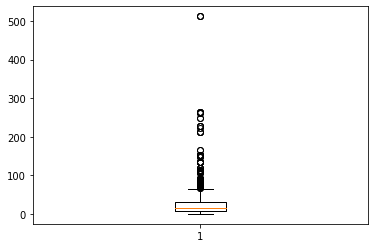

In [ ]:
#Fare column
plt.boxplot(data['Fare'])

7.8771
10.5
23.0
low_limit is: -14.807249999999998
upper limit is: 45.684349999999995
outlier is : []


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


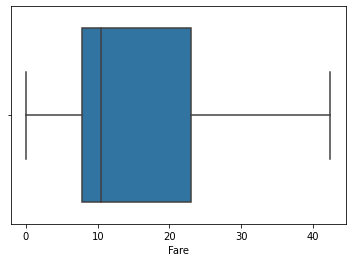

In [22]:
#handling outliers in Fare
Q1 = np.percentile(data['Fare'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Fare'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Fare'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
upp_limit = Q3+1.5*IQR
print('low_limit is:',low_limit)
print('upper limit is:',upp_limit)
outlier =[]
for x in data['Fare']:
    if((x>upp_limit)or(x<low_limit)):
        outlier.append(x)
print("outlier is :", outlier)
#finding index of outlier
index=data['Fare'][(data['Fare']>upp_limit)|(data['Fare']<low_limit)].index

#dropping outlier
data.drop(index,inplace=True)
sns.boxplot(data['Fare'],data=data)


{'boxes': [<matplotlib.lines.Line2D at 0x7fa4126182d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa4126233d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa4126097d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa412623e90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa412618910>,
  <matplotlib.lines.Line2D at 0x7fa412618e50>]}

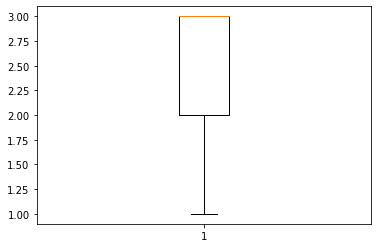

In [10]:
#Pclass column
plt.boxplot(data['Pclass'])

2.0
3.0
3.0
Pclass low_limit is: 0.5
Pclass upper limit is: 4.5
Pclass outlier is : []


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


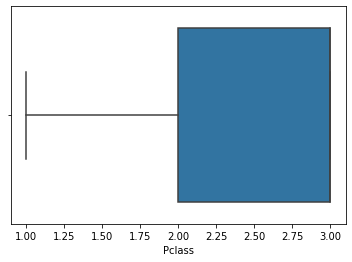

In [11]:
#handling outliers in Fare
Q1 = np.percentile(data['Pclass'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Pclass'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Pclass'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
upp_limit = Q3+1.5*IQR
print('Pclass low_limit is:',low_limit)
print('Pclass upper limit is:',upp_limit)
outlier =[]
for x in data['Pclass']:
    if((x>upp_limit)or(x<low_limit)):
        outlier.append(x)
print("Pclass outlier is :", outlier)
#finding index of outlier
index=data['Pclass'][(data['Pclass']>upp_limit)|(data['Pclass']<low_limit)].index

#dropping outlier
data.drop(index,inplace=True)
sns.boxplot(data['Pclass'],data=data)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa410d716d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa410d757d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa410d7a810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa410d7a2d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa410d71d10>,
  <matplotlib.lines.Line2D at 0x7fa410d75290>]}

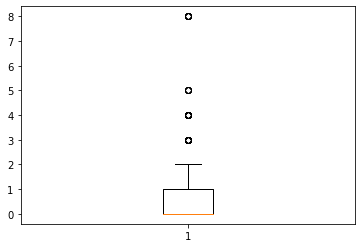

In [13]:
#SibSp - Number of Siblings/Spouses Aboard  column
plt.boxplot(data['SibSp'])

0.0
0.0
1.0
SibSp low_limit is: -1.5
SibSp upper limit is: 2.5
SibSp outlier is : [3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


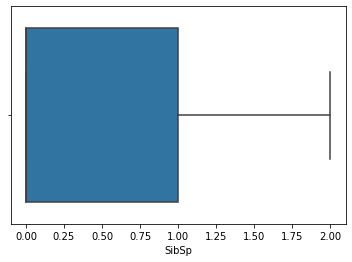

In [14]:
#handling outliers in SibSp
Q1 = np.percentile(data['SibSp'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SibSp'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SibSp'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
upp_limit = Q3+1.5*IQR
print('SibSp low_limit is:',low_limit)
print('SibSp upper limit is:',upp_limit)
outlier =[]
for x in data['SibSp']:
    if((x>upp_limit)or(x<low_limit)):
        outlier.append(x)
print("SibSp outlier is :", outlier)
#finding index of outlier
index=data['SibSp'][(data['SibSp']>upp_limit)|(data['SibSp']<low_limit)].index

#dropping outlier
data.drop(index,inplace=True)
sns.boxplot(data['SibSp'],data=data)

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)
